In [1]:
# Install dependencies
!pip install mediapipe
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
import cv2
import matplotlib.pyplot as plt
import random
from mosaic import FaceMosaic
from pathlib import Path
from tqdm import tqdm

2024-05-15 13:49:17.339349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# DATASET_PATH = Path(r'/home/phdomingues/masters/data/UNIFESP/all')
# DATASET_PATH = Path(r'/home/phdomingues/masters/data/UNIFESP/syntetic/synthetics')
# DATASET_PATH = Path(r'/home/phdomingues/masters/data/UNIFESP/super_resolution/subset')
DATASET_PATH = Path(r'')
OUTPUT_PATH = DATASET_PATH.parent / 'mosaico2_non_masked'

SAMPLE_SIZE = 5 # Numero de amostras que serao plotadas
MASK = False

IMG_SUFFIXES = ['.png', '.jpg', '.jpeg', '.bmp']

In [4]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

def batch_array(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

In [5]:
fm = FaceMosaic()

img_paths = [str(path.resolve()) for path in DATASET_PATH.glob('*') if path.suffix in IMG_SUFFIXES]

# TODO: REMOVER
# img_paths = img_paths[:10]

face_not_found = []
face_data = []
for batch in batch_array(img_paths, n=1):
    results = fm.detect_landmarks(batch)
    for result, img_path in zip(results, batch):
        faces_data, img = result
        if len(faces_data.face_landmarks) == 0:
            face_not_found.append(img_path)
        else:
            face_data.append((*result, img_path))

if len(face_not_found) > 0:
    print(f"WARNING: {len(face_not_found)} faces not found for the following images:")
    for img_path in face_not_found:
        print(f"  - {img_path}")


E0000 00:00:1715612055.504724    9056 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
I0000 00:00:1715612055.504764    9056 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1715612055.517331    9056 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
E0000 00:00:1715612055.568597    9056 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1715612055.568614    9056 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1715612055.568620    9056 gl_context.cc:408] INTERNAL: ; 

  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/01_113837.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/01_114118.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/02_114411.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/03_111130.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/05_105759.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/05_110159.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/06_112549.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/06_112818.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/09_142459.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/09_142758.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/09_143147.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/09_143255.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/11_180259.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/11_180719.bmp
  - /mnt/d/ComputerScience/Mestrado/data/UNIFESP/all/15_151810

I0000 00:00:1715612102.295040    9056 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
W0000 00:00:1715612102.307578    9056 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
E0000 00:00:1715612102.354582    9056 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1715612102.354596    9056 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1715612102.354602    9056 gl_context.cc:408] INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:303) successeglMakeCurrent() returned error 0x3008;  (entering GL context)
E0000 00:00:1715612102.354608    9056 gl_context.cc:408] INTERNAL: ; 

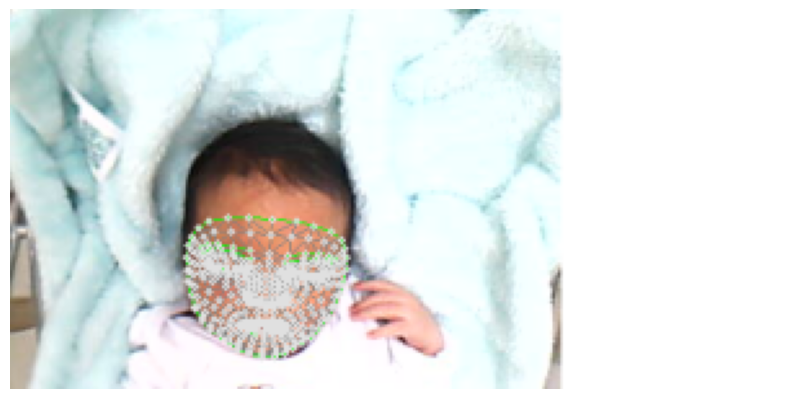

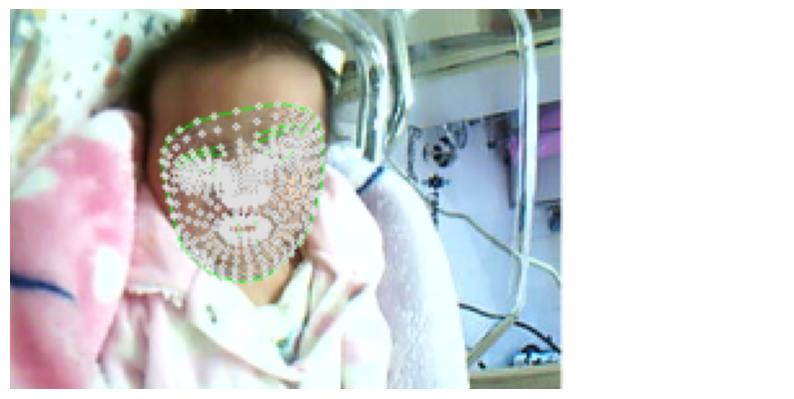

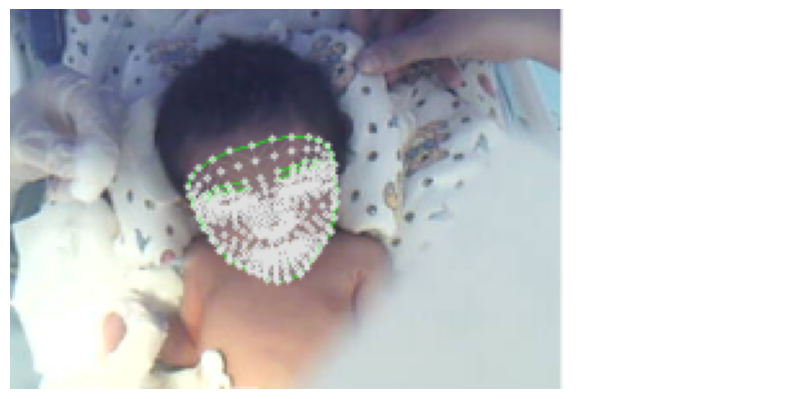

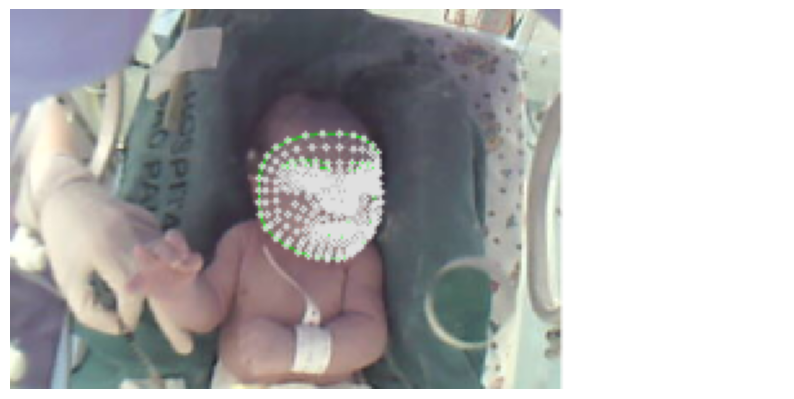

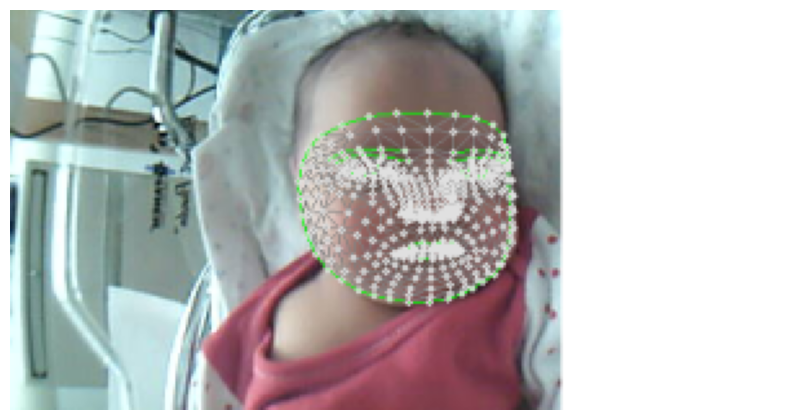

In [6]:
for result in random.sample(face_data, SAMPLE_SIZE):
    fig = plt.figure(figsize=(10,10))
    img = fm.draw_landmarks(*result[:2])
    plt.imshow(image_resize(img, width=300))
    plt.axis('off')

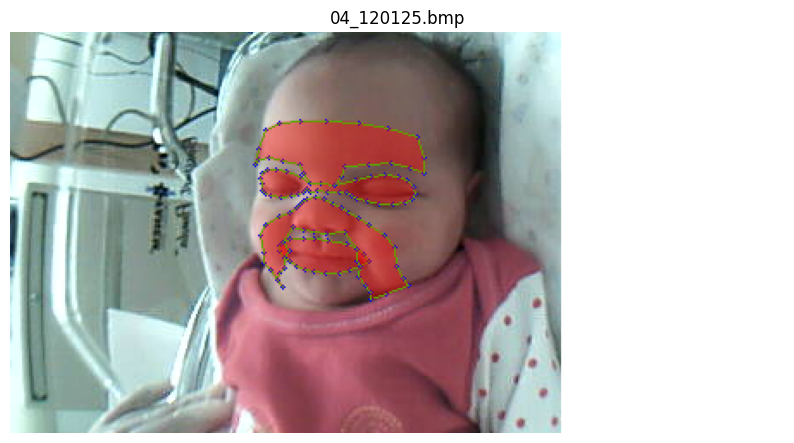

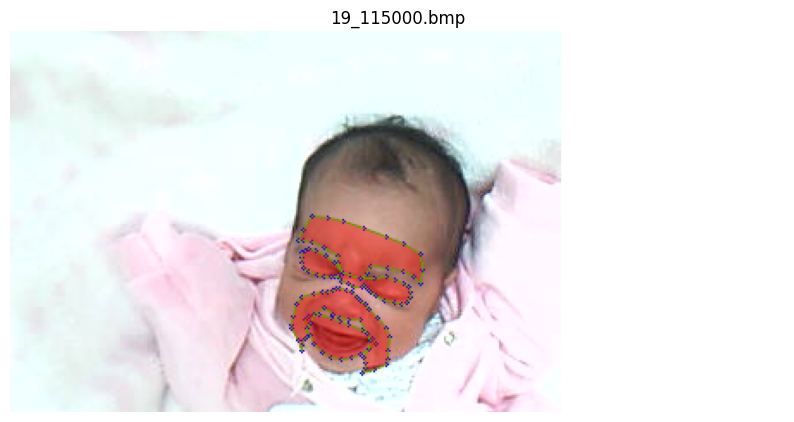

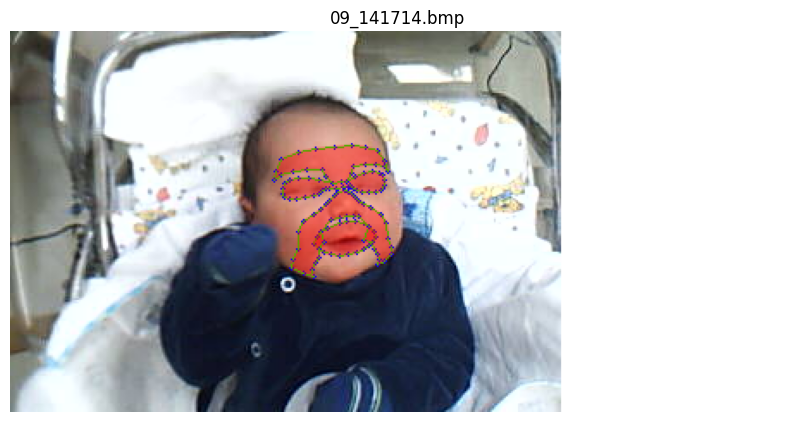

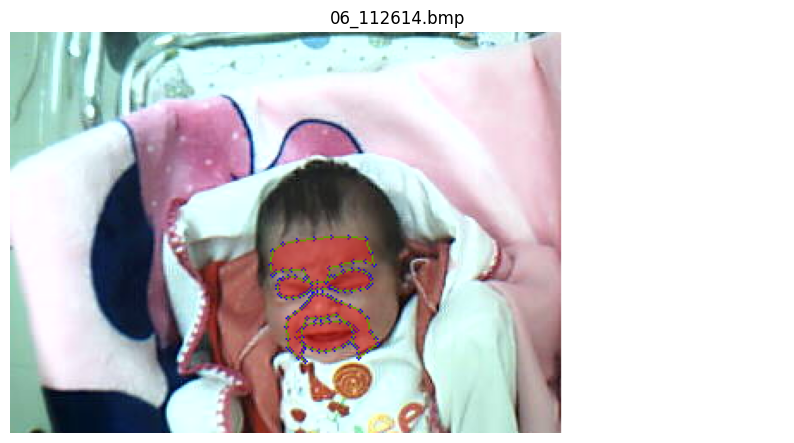

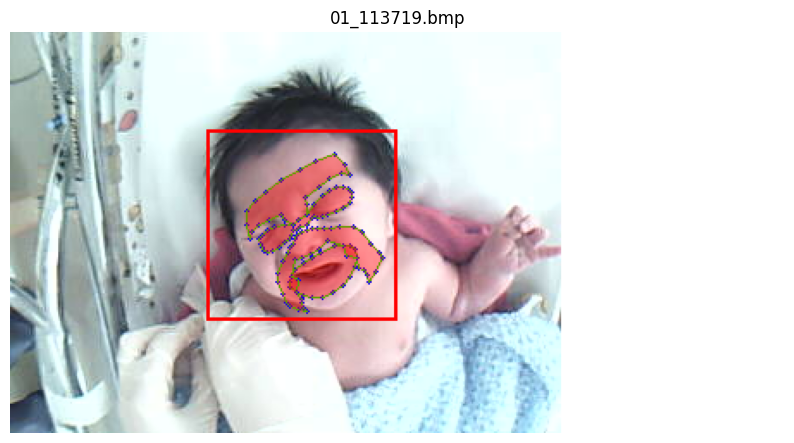

In [7]:
for result in random.sample(face_data, SAMPLE_SIZE):
    fig = plt.figure(figsize=(10,10))
    plt.imshow(fm.draw_mosaic(*result[:2], points=True, lines=True))
    plt.title(Path(result[2]).name)
    plt.axis('off')

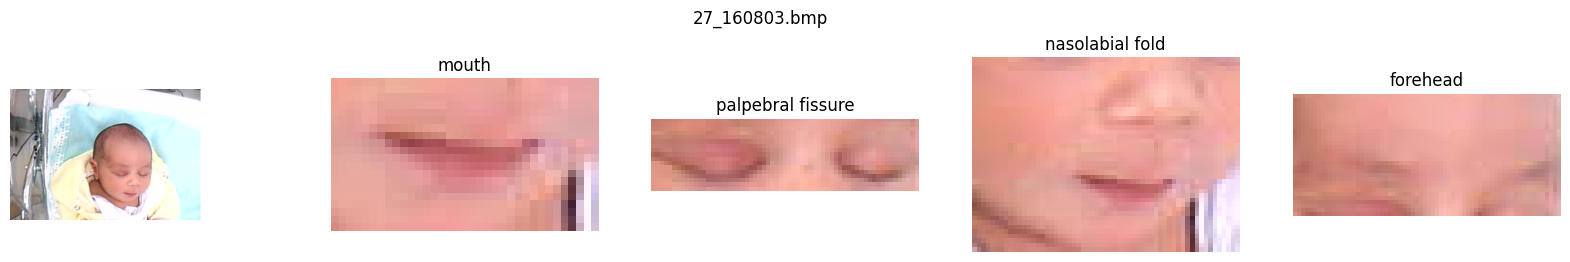

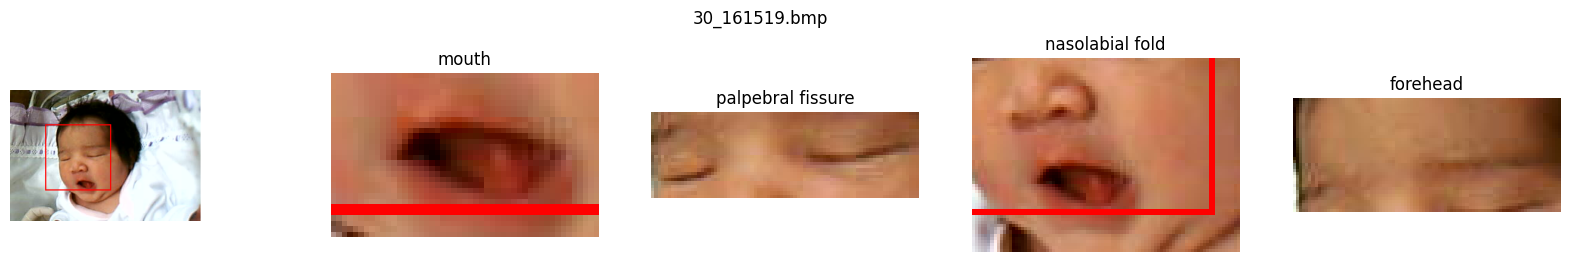

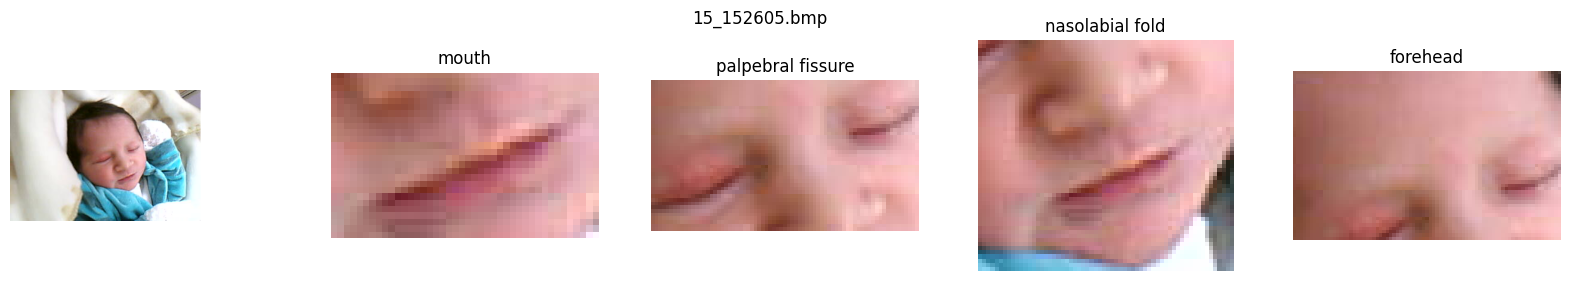

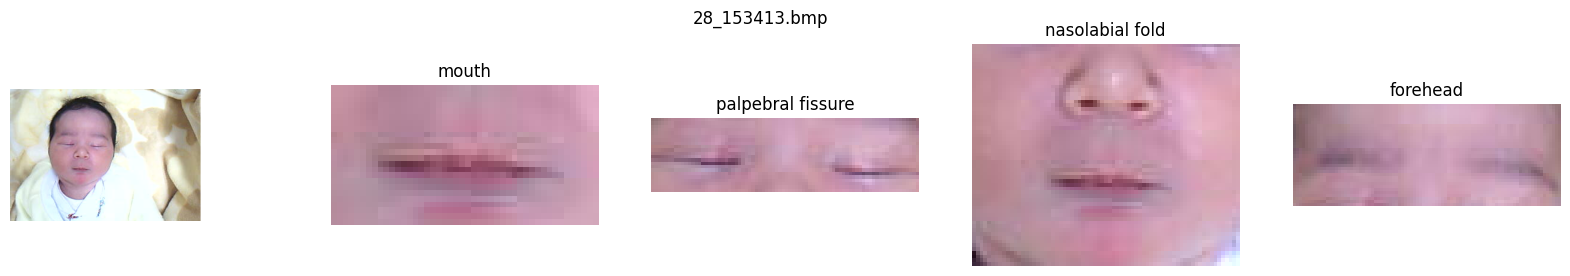

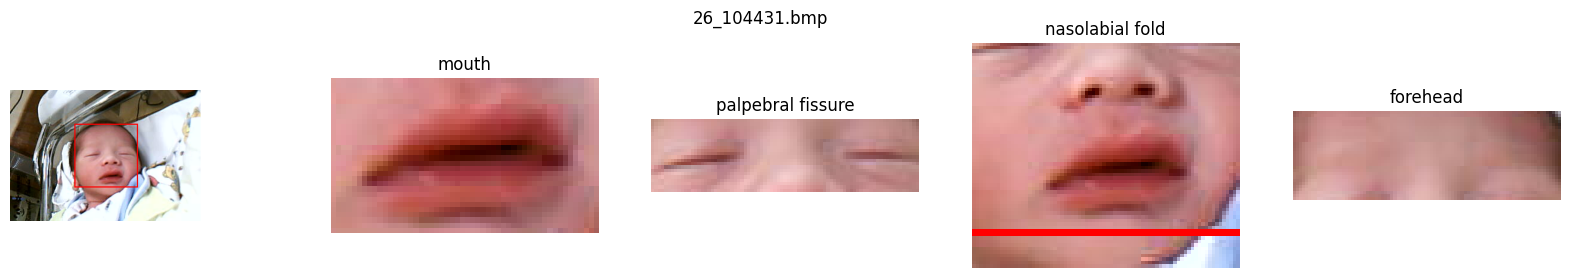

In [8]:
for result in random.sample(face_data, SAMPLE_SIZE):
    detection_result, image, img_path = result 
    data = fm.create_masks(detection_result, image)
    fig, axs = plt.subplots(1, 5, figsize=(20,3))
    fig.suptitle(Path(img_path).name)
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].axis('off')
    for i, (key, value) in enumerate(data.items()):
        axs[i+1].imshow(fm.apply_mask(image, value, crop=True) if MASK else fm.crop(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), value))
        axs[i+1].set_title(key)
        axs[i+1].axis('off')
    plt.show()

In [9]:
for result in tqdm(face_data):
    detection_result, image, img_path = result 
    img_path = Path(img_path)
    data = fm.create_masks(detection_result, image)
    for i, (key, value) in enumerate(data.items()):
        save_dir = OUTPUT_PATH / key.replace(' ', '_')
        save_dir.mkdir(exist_ok=True, parents=True)
        crop = fm.apply_mask(image, value, crop=True) if MASK else fm.crop(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), value)
        crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        cv2.imwrite(str(save_dir / img_path.with_suffix('.jpg').name), crop)

100%|██████████| 306/306 [00:06<00:00, 46.58it/s]


In [10]:
print('01_113837.bmp', '01_114118.bmp', '02_114411.bmp', '03_111130.bmp', '05_105759.bmp', '05_110159.bmp', '06_112549.bmp', '06_112818.bmp', '09_142459.bmp', '09_142758.bmp', '09_143147.bmp', '09_143255.bmp', '11_180259.bmp', '11_180719.bmp', '15_151810.bmp', '15_151855.bmp', '17_103918.bmp', '17_104926.bmp', '17_104930.bmp', '17_105010.bmp', '17_105338.bmp', '17_105739.bmp', '19_114851.bmp', '19_115154.bmp', '22_112632.bmp', '22_112640.bmp', '22_112648.bmp', '22_112714.bmp', '22_112733.bmp', '22_112737.bmp', '22_112802.bmp', '22_112806.bmp', '22_112832.bmp', '23_143914.bmp', '23_143940.bmp', '23_144038.bmp', '23_144116.bmp', '23_144657.bmp', '23_144702.bmp', '23_144757.bmp', '24_150441.bmp', '24_150941.bmp', '25_103203.bmp', '25_103348.bmp', '25_103401.bmp', '26_123459.bmp', '29_111247.bmp', '29_111342.bmp', '30_161340.bmp', '30_161533.bmp', '30_161549.bmp', '30_161557.bmp', '30_161606.bmp', '30_161630.bmp')

01_113837.bmp 01_114118.bmp 02_114411.bmp 03_111130.bmp 05_105759.bmp 05_110159.bmp 06_112549.bmp 06_112818.bmp 09_142459.bmp 09_142758.bmp 09_143147.bmp 09_143255.bmp 11_180259.bmp 11_180719.bmp 15_151810.bmp 15_151855.bmp 17_103918.bmp 17_104926.bmp 17_104930.bmp 17_105010.bmp 17_105338.bmp 17_105739.bmp 19_114851.bmp 19_115154.bmp 22_112632.bmp 22_112640.bmp 22_112648.bmp 22_112714.bmp 22_112733.bmp 22_112737.bmp 22_112802.bmp 22_112806.bmp 22_112832.bmp 23_143914.bmp 23_143940.bmp 23_144038.bmp 23_144116.bmp 23_144657.bmp 23_144702.bmp 23_144757.bmp 24_150441.bmp 24_150941.bmp 25_103203.bmp 25_103348.bmp 25_103401.bmp 26_123459.bmp 29_111247.bmp 29_111342.bmp 30_161340.bmp 30_161533.bmp 30_161549.bmp 30_161557.bmp 30_161606.bmp 30_161630.bmp


In [11]:
for batch in batch_array(face_not_found, 10):
    print(', '.join([Path(i).name for i in batch]))

01_113837.bmp, 01_114118.bmp, 02_114411.bmp, 03_111130.bmp, 05_105759.bmp, 05_110159.bmp, 06_112549.bmp, 06_112818.bmp, 09_142459.bmp, 09_142758.bmp
09_143147.bmp, 09_143255.bmp, 11_180259.bmp, 11_180719.bmp, 15_151810.bmp, 15_151855.bmp, 17_103918.bmp, 17_104926.bmp, 17_104930.bmp, 17_105010.bmp
17_105338.bmp, 17_105739.bmp, 19_114851.bmp, 19_115154.bmp, 22_112632.bmp, 22_112640.bmp, 22_112648.bmp, 22_112714.bmp, 22_112733.bmp, 22_112737.bmp
22_112802.bmp, 22_112806.bmp, 22_112832.bmp, 23_143914.bmp, 23_143940.bmp, 23_144038.bmp, 23_144116.bmp, 23_144657.bmp, 23_144702.bmp, 23_144757.bmp
24_150441.bmp, 24_150941.bmp, 25_103203.bmp, 25_103348.bmp, 25_103401.bmp, 26_123459.bmp, 29_111247.bmp, 29_111342.bmp, 30_161340.bmp, 30_161533.bmp
30_161549.bmp, 30_161557.bmp, 30_161606.bmp, 30_161630.bmp
